# Introduction to Python and Natural Language Technologies
## Lecture 08, Deep Learning for NLP

November 04, 2020

Ádám Kovács

This lecture aims to give an introduction to the main concepts of NLP and deep learning. We are also going to learn about [Pytorch](https://pytorch.org/), one of the most popular deep learning libraries of Python.

## Preparation

[Download GLOVE](http://sandbox.hlt.bme.hu/~adaamko/glove.6B.100d.txt)

In [ ]:
!pip install spacy

!pip install textacy

!pip install flair

!pip install torchtext

!pip install gensim

!pip install -U scikit-learn

!python -m spacy download en

## NLP Tasks
-  **Why do we need NLP?**
    - Make the computer understand text
    - Extract useful information from it
    
    
-  **Tasks most people would think of**

    - Spellchecking
    
    - Machine translation
    
    
- **Basic preprocessing tasks:**

    -   Tokenization
        - Splitting text into words, sentences, documents, etc..

    -   POS tagging
        - Words can be groupped into grammatical categories.

    -   Lemmatization
        - Finding the lemma of a word, e.g. dogs -> dog
        
    -   Morphological analyzis
    
    

- **More advanced**

    -   Syntactic parsing

    -   Named entity recognition
    
    -   Language modelling
    
    

- **Semantic tasks:**

    -   Summarization

    -   Sentiment Analysis

    -   Question Answering
    -   Lexical Inference
    -   Machine Comprehension
    -   Chatbots?

- **Demos:**
    - http://e-magyar.hu/hu/parser
    - https://demo.allennlp.org/reading-comprehension
    - https://talktotransformer.com/
    - [GPT-3](https://github.com/elyase/awesome-gpt3) (*has 175B parameters*)

## Representations

To be able to run machine learning algorithms the computer needs numerical representations. For natural text input this means we need a mapping that converts strings to a numerical represenatation. **one-hot encoding** is the easiest approach where we map each word to an integer id.


In [ ]:
sentence = "yesterday the lazy dog went to the store to buy food"

In [ ]:
mapping = dict()
max_id = 0

for word in sentence.split():
    if word not in mapping:
        mapping[word] = max_id
        max_id = max_id + 1
        
print(mapping)

## Problems
- When representing words with id's we assign them to the words in the order of the encounter. 
- This means that we may assign different vectors to the words each time we run the algorithm.
- Doesn't include any concept of similarity, e.g: `similarity(embedding(cat, dog)) > similarity(embedding(cat, computer))`
- The representation is very sparse and could have very high dimension, which would also slow the computations. The size is given by the vocabulary of our corpus, that can be over 100000 dimension.

## Word embeddings

- map each word to a small dimensional (around 100-300) continuous vectors.
- this means that similar words should have similar vectors.
    - what do we mean by word similarity ?
    
    
### Cosine similarity

- Now that we have word vectors, we need a way to quantify the similarity between individual words, according to these vectors. One such metric is cosine-similarity. We will be using this to find words that are "close" and "far" from one another.

![image.png](https://cmry.github.io/sources/eucos.png)

    
### Creating word embeddings

"a word is characterized by the company it keeps" -- popularized by Firth

- A popular theory is that words are as similar as their context is
- Word embeddings are also created with neural networks that predicts the word's context from the word itself

To create word embeddings, a neural network is trained to perform the tasks. But then it is not used actually for the task it was trained it on. The goal is actually to learn the weights of the hidden layer. Then, these weights will be our vectors called "word embeddings".

__Neural Network?__


## Neural networks and Deep learning
- Neural network is inspired by the information processing methods of biological nervous systems
- It is composed of neurons, each layer connected to the next
- Deep learning is a neural network consisting of multiple layers
    - the idea is not new
    - it is returned because of the rise of the GPUs
    - good frameworks (Pytorch, Tensorflow)

<img src="img/dl/network.png">


this is a __feed forward neural network__ with two hidden layers. Each neuron contains an activation function:

$$\mathbf{h_1} = \sigma (\mathbf{W_1 x})$$
$$\mathbf{h_2} = \sigma (\mathbf{W_2 h_1})$$
$$\mathbf{y} = \sigma (\mathbf{W_3 h_2})$$

$\sigma$: activation function, typically non-linear such as the sigmoid
function $$\sigma(x) = \frac{1}{1 + e^{-x}}$$

During the training, the weights are learned to predict a value of a new input.

__What is inside a neuron?__

![perceptron](https://c.mql5.com/2/35/artificialneuron__1.gif)


*image from https://www.mql5.com/en/blogs/post/724245*

## ML vs DL

- Deep learning
    - Automatic feature engineering
    - Scalable with big data
    - Can solve non-separable problems as well (traditional methods struggle with non-linearity)
    - Currently most state-of-the-art methods are based on DL
- Traditional Machine Learning
    - Feature extraction is done manually
    - Can learn relatively well from small data (DL can’t)
    - Scalability is worse with big data
    - It can be enough for small tasks

## Learning types 
-   **Supervised learning**

    -   is a problem where for every input variable(x) there is an ouput
        variable(y) in the training data

    -   the preparation of the output variables is usually done with
        Human resources - Labeled data

-   **Unsupervised learning**

    -   is a problem where only the input variable(x) is present in the
        training data

    -   still can be very useful since labeling data is very resource
        hungry and expensive

## Learning problems

-   __Classification__ (supervised learning)

    -   assign a label for each sample

    -   labels are predefined and usually not very numerous

    -   e.g. sentiment analysis

-   __Regression__ (supervised learning)

    -   predict a continuous variable

    -   e.g. predict real estate prices, stock market based on history,
        location, amenities


-   __Clustering__ (unsupervised learning)

    -   group samples into clusters according to a similarity measure
     
    -   e.g. group similar facebook comments
    
    -   goal: high intra-group similarity (samples in the same cluster
        should be similar to each other), low inter-group similarity
        (samples in different clusters shouldn’t be similar)


### Evaluation - Binary classification

<img src="img/dl/true_false.png" />

**Accuracy**: fraction of correctly guessed labels among all the samples

#### __Precision, recall and F-score:__

**Precision**: fraction of positive samples among those labeled positive
$$\text{Precision}=\frac{tp}{tp+fp}$$

**Recall**: fraction of recovered positive samples of all positive
samples $$\text{Recall}=\frac{tp}{tp+fn}$$

**F-score**: harmonic mean of precision and recall
$$\text{F-score} = 2 * \frac{\text{prec}  \text{rec}}{\text{prec} + \text{rec}}$$


### Evaluation - regression Root-mean-square error

$$\operatorname{RMSE}=\sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}},$$

where $\hat y_t$ are the predicted values, $y_t$ is the true value and
$n$ is the number of samples.

## Train, Validation and Test set

- __training set__
    - part of the dataset used for training -


- __validation dataset__
    - part of the dataset used for cross-validation, early stopping and
    hyperparameter tuning


- __test set__
    - part of the dataset used for testing trained models. Your method
    should only be tested once on the test set.

<img src="img/dl/train_test_val.png" />

## Important concepts in Machine Learning

- __Cost Function__: used to measure how badly our models are performing on a data
- __Parameters__: variables that are updated during the training
- __Sample__: single row in our data
- __Batch size__: the number of samples our model works throught before updating the weights
- __Epoch__: one epoch means that each sample in the training dataset was iterated through the model
- __Iteration__ – one update on the weights. It happens once for each batch.
- __Hyperparameters__ – variables that don't change during training (number of epochs, batch size, learning rate, etc..)

- __Gradient descent__: used to find the global optimum in the cost function

<img src="img/dl/gradient.gif?raw=true" />

## Back to embeddings

Word embeddings are also learned with neural networks.

Given a specific word, a neural network will look at the words nearby and learn the probability of being the "nearby word". The "nearby" is actually given by a windows size that is a parameter of the algorithm (dog is more likely to appear next to cat than computer).

The training examples are generated from big text corpora. For example from the sentence “The quick brown fox jumps over the lazy dog.” we can generate the following inputs:

![training examples](http://mccormickml.com/assets/word2vec/training_data.png)

To do this, we first build a vocabulary of words from our training documents–let’s say we have a vocabulary of 10,000 unique words. The vocabulary of big corporas can be much more then 10,000 unique words, to handle them we usually substitute rare words with a special token (this is usually the _UNK_ token).

First we build the vocabulary of our documents, then for representing words, we will use one-hot vectors. The output of the network will be a single vector that contains the probabilities for the "nearby" words.

![architecture](http://mccormickml.com/assets/word2vec/skip_gram_net_arch.png)

_(images from mccormicklm.com)_

### Famous static word embeddings for English

- [Word2vec](https://arxiv.org/pdf/1301.3781.pdf)
- [GLOVE](https://nlp.stanford.edu/projects/glove/)

### Contextual embeddings?

- [Elmo](https://allennlp.org/elmo)
- [BERT](https://arxiv.org/abs/1810.04805)
- [Flair](https://www.aclweb.org/anthology/N19-4010/)

For static embeddings, we will use a GLOVE embedding of 100 dimensional vectors trained on 6B tokens.

[Download GLOVE](http://sandbox.hlt.bme.hu/~adaamko/glove.6B.100d.txt)

In [2]:
import gensim

In [3]:
embedding_file = "glove.6B.100d.txt"

embedding = gensim.models.KeyedVectors.load_word2vec_format(embedding_file, binary=False)

In [4]:
dog_vector = embedding["dog"]

In [5]:
embedding.most_similar("president")

[('vice', 0.828760027885437),
 ('presidency', 0.715021550655365),
 ('former', 0.7060940265655518),
 ('presidents', 0.6961984038352966),
 ('chairman', 0.6928697824478149),
 ('secretary', 0.6858575344085693),
 ('clinton', 0.6844353675842285),
 ('leader', 0.6837862730026245),
 ('government', 0.6826310157775879),
 ('met', 0.6825153827667236)]

In [5]:
embedding.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7698541283607483),
 ('monarch', 0.6843380928039551),
 ('throne', 0.6755736470222473),
 ('daughter', 0.6594555974006653),
 ('princess', 0.6520533561706543),
 ('prince', 0.6517034769058228),
 ('elizabeth', 0.6464517712593079),
 ('mother', 0.631171703338623),
 ('emperor', 0.6106469631195068),
 ('wife', 0.6098655462265015)]

In [6]:
embedding.similarity("woman", "computer")

0.28278553

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')
matplotlib.pyplot.rcParams['figure.figsize'] = (16, 10)
matplotlib.pyplot.rcParams['font.family'] = 'sans-serif'
matplotlib.pyplot.rcParams['font.size'] = 20

In [10]:
def tsne_plot(model, size=500):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    
    for i, word in enumerate(model.wv.vocab):
        if len(tokens) > size:
            break
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/home/adaamko/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


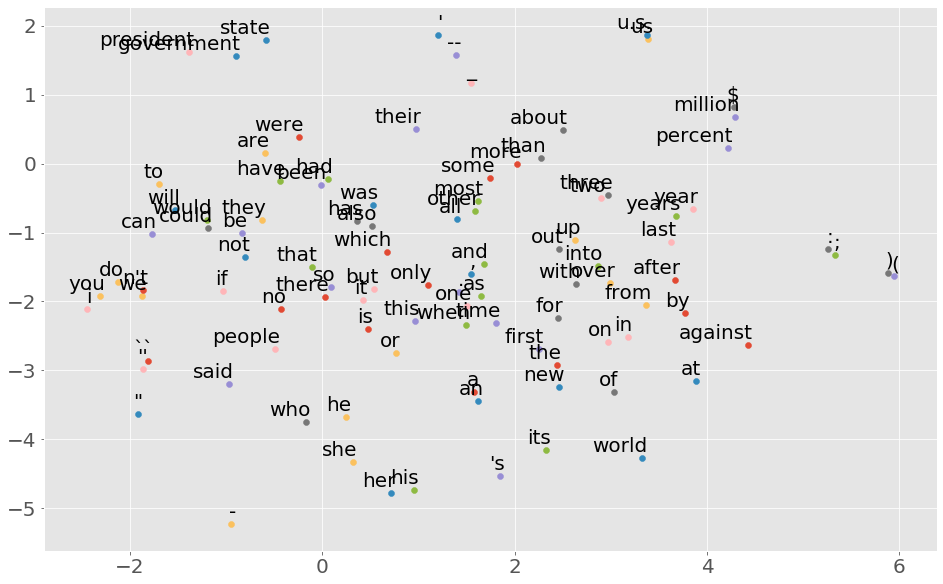

In [13]:
tsne_plot(embedding, 100)

## Analogies

In [14]:
def analogy(word1, word2, word3, n=5):
    
    #get vectors for each word
    word1_vector = embedding[word1]
    word2_vector = embedding[word2]
    word3_vector = embedding[word3]
    
    #calculate analogy vector
    analogy_vector = embedding.most_similar(positive=[word3, word2], negative=[word1])
    
    print(word1 + " is to " + word2 + " as " + word3 + " is to...")
    
    return analogy_vector

In [19]:
analogy('man', 'king', 'woman')

obama is to america as merkel is to...


[('europe', 0.7116252183914185),
 ('germany', 0.6563645601272583),
 ('european', 0.614357054233551),
 ('france', 0.5843942761421204),
 ('scandinavia', 0.5677825808525085),
 ('german', 0.5659710168838501),
 ('eu', 0.5564638376235962),
 ('world', 0.5447453260421753),
 ('continent', 0.539059042930603),
 ('baltic', 0.5320243239402771)]

## Contextual embeddings

In GloVe and Word2vec representations, words have a static representation. But words can have different meaning in different contexts, e.g. the word "stick":

1. Find some dry sticks and we'll make a campfire.
2. Let's stick with glove embeddings.

![elmo](http://jalammar.github.io/images/elmo-embedding-robin-williams.png)

_(Peters et. al., 2018 in the ELMo paper)_

In [1]:
# The sentence objects holds a sentence that we may want to embed or tag
from flair.data import Sentence
from flair.embeddings import FlairEmbeddings

# init embedding
flair_embedding_forward = FlairEmbeddings('news-forward')

# create a sentence
sentence1 = Sentence("Find some dry sticks and we'll make a campfire.")
sentence2 = Sentence("Let's stick with glove embeddings.")

# embed words in sentence
flair_embedding_forward.embed(sentence2)
for token in sentence2:
    print(token)
    print(token.embedding)

/home/adaamko/miniconda3/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729047590/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


2020-11-04 11:06:43,313 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-forward-0.4.1.pt not found in cache, downloading to /tmp/tmph2sqnvnf


100%|██████████| 73034624/73034624 [00:03<00:00, 18500711.49B/s]

2020-11-04 11:06:47,376 copying /tmp/tmph2sqnvnf to cache at /home/adaamko/.flair/embeddings/news-forward-0.4.1.pt


2020-11-04 11:06:47,476 removing temp file /tmp/tmph2sqnvnf
Token: 1 Let
tensor([ 0.0687,  0.0029, -0.0452,  ..., -0.0042, -0.0120,  0.1560])
Token: 2 's
tensor([ 8.3051e-03,  5.2285e-03,  5.4497e-02,  ..., -5.9337e-05,
        -7.1995e-02,  2.8605e-02])
Token: 3 stick
tensor([-0.0033,  0.0043,  0.0087,  ..., -0.0058, -0.0211,  0.0066])
Token: 4 with
tensor([-0.0036,  0.0004,  0.0244,  ..., -0.0002, -0.0004,  0.0143])
Token: 5 glove
tensor([-8.7836e-05,  1.8126e-04,  2.7836e-02,  ..., -3.5465e-02,
         1.5061e-03,  4.0949e-03])
Token: 6 embeddings
tensor([ 1.0793e-05,  1.5989e-04,  5.0775e-02,  ..., -5.3303e-04,
        -1.2207e-02,  1.5378e-02])
Token: 7 .
tensor([7.7768e-04, 6.3857e-05, 2.1315e-01,  ..., 3.3295e-05, 4.0031e-03,
        4.8209e-03])


In Flair, a pretrained NER tagger is also available to use

### Load matplotlib, pandas and spacy

In [7]:
import spacy
from spacy import displacy

import os

import pandas as pd

import spacy
import pandas as pd
import re

In [8]:
nlp = spacy.load("en")

# Data analysis

- we use nlp frameworks for the basic tasks
- for the preprocessing tasks (lemmatization, tokenization) we use [spaCy](https://spacy.io/)
- for keyword extraction and various text analyzation tasks we use [textacy](https://github.com/chartbeat-labs/textacy)
- textacy builds on spaCy output
- both are open source python libraries

__AG_NEWS__ classes:
- World

- Sports

- Business

- Sci/Tech

In [9]:
NGRAMS = 2
from torchtext import data
from torchtext.datasets import text_classification
import os
if not os.path.isdir('./data'):
    os.mkdir('./data')
text_classification.DATASETS['AG_NEWS'](
    root='./data', ngrams=NGRAMS, vocab=None)

120000lines [00:11, 10256.61lines/s]
120000lines [00:24, 4902.06lines/s]
7600lines [00:01, 4888.81lines/s]


(<torchtext.datasets.text_classification.TextClassificationDataset at 0x7fd3bad72cc0>,
 <torchtext.datasets.text_classification.TextClassificationDataset at 0x7fd3eb4615c0>)

In [10]:
train_data = pd.read_csv("./data/ag_news_csv/train.csv",quotechar='"', names=['label', 'title', 'description'])
test_data = pd.read_csv("./data/ag_news_csv/test.csv",quotechar='"', names=['label', 'title', 'description'])

In [11]:
train_data.head()

,label,title,description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [12]:
train_data["text"] = train_data.title +  "," + train_data.description
train_data = train_data.drop("title", axis=1)
train_data = train_data.drop("description", axis=1)

test_data["text"] = test_data.title +  "," + test_data.description
test_data = test_data.drop("title", axis=1)
test_data = test_data.drop("description", axis=1)

In [13]:
train_data.label.value_counts()

4    30000
3    30000
2    30000
1    30000
Name: label, dtype: int64

In [14]:
doc = nlp("Donald Trump called and asked me to serve as his running mate and Vice Presidential nominee.")

In [15]:
for tok in doc:
    print(tok.pos_)

PROPN
PROPN
VERB
CCONJ
VERB
PRON
PART
VERB
SCONJ
DET
VERB
NOUN
CCONJ
PROPN
PROPN
NOUN
PUNCT


In [16]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 100})
displacy.render(doc, style='ent', jupyter=True)

In [17]:
text_sports = train_data[train_data.label == 2]

text = " ".join(text_sports.text.tolist())
doc_text = nlp(text[:200000])

In [18]:
import textacy
from textacy.extract import ngrams
from collections import Counter

Counter([ng.text.lower() for n in [2,4] for ng in ngrams(doc_text, n)]).most_common(10)

[('gold medal', 61),
 ('united states', 55),
 ('athens olympics', 42),
 ('michael phelps', 36),
 ('new york', 30),
 ('olympic games', 26),
 ('athens games', 25),
 ('red sox', 24),
 ('greek sprinters', 23),
 ('gold medals', 19)]

In [19]:
from textacy import keyterms

keyterms.textrank(
    doc_text,
    normalize = "lemma",
    n_keyterms=10,
)


[('ATHENS', 0.005758175344719127),
 ('olympic', 0.005730339488932911),
 ('team', 0.0051234532394023626),
 ('Olympics', 0.005063945635677879),
 ('Tuesday', 0.0048017104336469645),
 ('gold', 0.00450994905319776),
 ('year', 0.004509167537888593),
 ('Wednesday', 0.004111372705267326),
 ('night', 0.0040835550554210055),
 ('Games', 0.0038775935022269457)]

In [20]:
textacy.keyterms.singlerank(
    doc_text,
    normalize = "lemma",
    n_keyterms=10,
)

[('team gold medal Tuesday night', 0.030096281119690375),
 ('relay olympic gold medal Wednesday', 0.02695844675473994),
 ('day event olympic gold medal', 0.02619382924971546),
 ('Michael Phelps win second gold medal', 0.024357551187573056),
 ('time trial gold medal Wednesday', 0.02257479509790246),
 ('fourth consecutive olympic gold medal', 0.022413447253468676),
 ('olympic tennis gold medal', 0.022350736527098243),
 ('straight olympic softball gold medal', 0.022047105004311996),
 ('olympic swimming gold medal', 0.02178026995572801),
 ('possible eight olympic gold medal', 0.02169097086836476)]

In [21]:
import math
from collections import Counter 
words = [tok for tok in doc_text if tok.is_alpha and not tok.is_stop]
word_probs = {tok.text.lower(): tok.prob for tok in words}

freqs = Counter(tok.text for tok in words)

5589


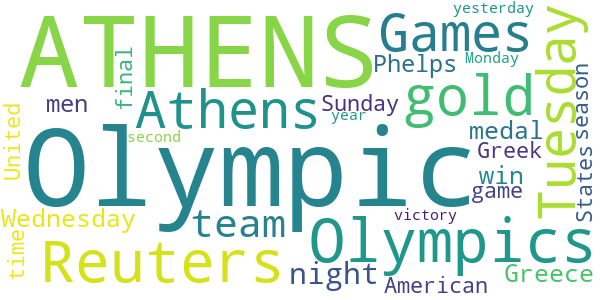

In [22]:
from wordcloud import WordCloud
print(len(freqs))
wordcloud = WordCloud(background_color="white", max_words=30, scale=1.5).generate_from_frequencies(freqs)
image = wordcloud.to_image()
image.save("./wordcloud.png")

from IPython.display import Image 
Image(filename='./wordcloud.png')

# Training a ML model

In [23]:
sample_df = train_data.groupby('label').apply(lambda x: x.sample(frac=0.2))

We add a new column to the table which will contain the cleaned and preprocessed text

In [24]:
from tqdm import tqdm

clean_text = []
for text in tqdm(sample_df['text']):
    doc = nlp(text)
    words = []
    for tok in doc:
        if not tok.is_stop and tok.is_alpha:
            words.append(tok.lemma_)
    clean_text.append(words)

# Add cleaned text to dataframe
sample_df['clean_text'] = clean_text
sample_df.head()

100%|██████████| 24000/24000 [09:57<00:00, 40.20it/s]


label                                               text  \
label                                                                    
1     58742       1  White House Sounds Out Europeans on Iran (AP),...   
      116113      1  Family wins inquiry into killing of prisoner s...   
      46441       1  UN Rights Officials Tell Security Council Inte...   
      111733      1  Analysis: Psst! Intifada #39;s over,It was a t...   
      94124       1  Afghan militants to decide fate of UN hostages...   

                                                     clean_text  
label                                                            
1     58742   [White, House, sound, Europeans, Iran, Bush, a...  
      116113  [family, win, inquiry, killing, prisoner, son,...  
      46441   [UN, Rights, Officials, Tell, Security, Counci...  
      111733  [analysis, Psst, Intifada, telling, sign, seni...  
      94124   [afghan, militant, decide, fate, UN, hostage, ...

In [25]:
labels = sample_df.label
data = sample_df['clean_text']

In [26]:
import gensim
from tqdm import tqdm
from sklearn.model_selection import train_test_split as split
import numpy as np

In [27]:
# We use the pretrained glove embedding
# To handle the Seq2Vec method, we take the mean of the word-vectors
def vectorize(tr_data, tst_data):
    print('\nLoading existing glove model...')
    embedding_file = "glove.6B.100d.txt"

    model = gensim.models.KeyedVectors.load_word2vec_format(embedding_file, binary=False)
    vectorizer = model.wv
    vocab_length = len(model.wv.vocab)
    
    tr_vectors = [
        np.array(np.mean([vectorizer[word] if word in model else np.zeros((100,)) for word in article], axis=0)) for article in tqdm(tr_data,'Vectorizing')
    ]
    
    tst_vectors = [
        np.array(np.mean([vectorizer[word] if word in model else np.zeros((100,)) for word in article], axis=0)) for article in tqdm(tst_data,'Vectorizing')
    ]
    
    return tr_vectors, tst_vectors

In [28]:
def get_features_and_labels(data, labels):
    tr_data,tst_data,tr_labels,tst_labels = split(data,labels,test_size=0.3)
    
    tst_vecs = []
    tr_vecs = []
    tr_vecs, tst_vecs = vectorize(tr_data, tst_data)    
    return tr_vecs, tr_labels, tst_vecs, tst_labels

In [29]:
tr_vecs, tr_labels, tst_vecs, tst_labels = get_features_and_labels(data, labels)


Loading existing glove model...


/home/adaamko/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/home/adaamko/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':
Vectorizing: 100%|██████████| 7200/7200 [00:00<00:00, 7448.40it/s]


In [30]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

### You can try different classifiers as well
- Multiple are available from [scikit-learn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

In [31]:
rf  =  RandomForestClassifier(n_estimators=100, verbose=True, n_jobs=-1)
svc = SVC()
lr  = LogisticRegression(n_jobs=-1)

In [32]:
rf.fit(tr_vecs, tr_labels)
svc.fit(tr_vecs, tr_labels)
lr.fit(tr_vecs, tr_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished


LogisticRegression(n_jobs=-1)

In [33]:
from sklearn.metrics import accuracy_score
print(type(tst_vecs))
rf_pred = rf.predict(tst_vecs)
svc_pred = svc.predict(tst_vecs)
lr_pred = lr.predict(tst_vecs)
print("Random Forest Test accuracy : {}".format(accuracy_score(tst_labels, rf_pred)))
print("SVC Test accuracy : {}".format(accuracy_score(tst_labels, svc_pred)))
print("Logistic Regression Test accuracy : {}".format(accuracy_score(tst_labels, lr_pred)))

<class 'list'>


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished


Random Forest Test accuracy : 0.8304166666666667
SVC Test accuracy : 0.8523611111111111
Logistic Regression Test accuracy : 0.8430555555555556


In [34]:
test_data.to_csv("dataset_test.csv", index=False)
train_data.to_csv("dataset_train.csv", index=False)

## Recurrent neural networks

In NLP, recurrent neural networks (RNN) are commonly used to analyse sequences. It takes in a sequence of words, one at a time, and produces hidden states ($h$) after each steps. RNN-s are used recurrently by feeding in the current word and the hidden state from the previous word.

Once we have our final hidden state, $h_T$, (from feeding in the last word in the sequence, $x_T$) we feed it through a linear layer, $f$ (fully connected layer) to reduce the dimension into the dimension of the labels.

![rnn](https://github.com/bentrevett/pytorch-sentiment-analysis/raw/79bb86abc9e89951a5f8c4a25ca5de6a491a4f5d/assets/sentiment1.png)

_(image from bentrevett)_


![rnn2](https://miro.medium.com/max/1400/1*WMnFSJHzOloFlJHU6fVN-g.gif)

![rnn3](https://miro.medium.com/max/770/1*o-Cq5U8-tfa1_ve2Pf3nfg.gif)



### LSTM

One of the biggest problem of recurrent neural networks is the vanishing gradient problem. It happens when the gradient shrinks during bakcpropagarion. If it becomes very small, the network stops learning. This mostly happen when long sentences are present. LSTM networks address this problem by having an inner memory cell to remember important information or forget others. LSTM has a similar flow as a RNN, it processes data and passes information as it propagates forward. The difference is in the operations within the cells.

![lstm](https://miro.medium.com/max/770/1*0f8r3Vd-i4ueYND1CUrhMA.png)

__LSTM__ consists of:

- __Forget gate__
    - Decides what information should be kept or thrown away
    - Information from the previous hidden state and from the current input

![forget](https://miro.medium.com/max/770/1*GjehOa513_BgpDDP6Vkw2Q.gif)

- __Input gate__
    - Decides what information is relevant to add from the current step

![input](https://miro.medium.com/max/770/1*TTmYy7Sy8uUXxUXfzmoKbA.gif)

- __Cell state__

![cell](https://miro.medium.com/max/770/1*S0rXIeO_VoUVOyrYHckUWg.gif)

- __Output gate__
    - Determines what the next hidden state should be

![lstm2](https://miro.medium.com/max/770/1*VOXRGhOShoWWks6ouoDN3Q.gif)

_(images from [link](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21))_
